- Titanic CV experiment
- Use RF classifier
- Perform 5CV experiment on data/titanic_train.scv , compute accuracy. 
- In case of problems, see 00_hint

In [20]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder #hint :) 
from sklearn.tree import plot_tree

from sklearn.utils import shuffle

#for nice output
pd.set_option("display.max_rows", 1500)
pd.set_option("display.max_columns", 1500)
pd.set_option("display.width", 1500)

#no warnings
pd.set_option('future.no_silent_downcasting', True)

le = LabelEncoder()
df = pd.read_csv('data/titanic_train.csv')
# Apply LabelEncoder to each column
for column in df.columns:
    df[column] = le.fit_transform(df[column])
y = pd.Series(data=df['Survived'].to_numpy())

df_iris, y = shuffle(df, y, random_state=42)

# CV experiment
cls = RandomForestClassifier(n_estimators=100, random_state=42,max_depth=2) 
scores = cross_val_score(cls,df_iris, y, cv=5)
print (f"Accuracy: {scores.mean():0.2f} ({scores.std():0.2f}) [{scores}]")

test_df = pd.read_csv('data/titanic_test.csv')

for column in df.columns:
    test_df[column] = le.fit_transform(test_df[column])


test_y = pd.Series(data=test_df['Survived'].to_numpy())
test_df_shuffled, test_y_shuffled = shuffle(test_df, test_y, random_state=42)

scores = cross_val_score(cls,test_df_shuffled, test_y_shuffled, cv=5)

Accuracy: 1.00 (0.00) [[1. 1. 1. 1. 1.]]
Accuracy: 0.95 (0.10) [[1.   1.   0.75 1.   1.  ]]


- Titanic train/test experiment
- Train RF classifier on data/titanic_train.scv, classify data/titanic_test.scv
- Compute accuracy.
- Observe the effect of max_depth parameter
- Print test dataframe with classification outcome as last column (True/False)

In [55]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

#for nice output
pd.set_option("display.max_rows", 1500)
pd.set_option("display.max_columns", 1500)
pd.set_option("display.width", 1500)

#no warnings
pd.set_option('future.no_silent_downcasting', True)

le = LabelEncoder()
df = pd.read_csv('data/titanic_train.csv')
# Apply LabelEncoder to each column
for column in ["Sex", "Embarked", "Ticket", "Cabin"]:
    df[column] = le.fit_transform(df[column])
del df["Name"]
y = pd.Series(data=df['Survived'].to_numpy())
del df["Survived"]

df_iris, y = shuffle(df, y, random_state=42)

# CV experiment
cls = RandomForestClassifier(n_estimators=100, random_state=42,max_depth=10) 
test_df = pd.read_csv('data/titanic_test.csv')

for column in ["Sex", "Embarked", "Ticket", "Cabin"]:
    test_df[column] = le.fit_transform(test_df[column])
del test_df["Name"]

test_y = pd.Series(data=test_df['Survived'].to_numpy())
del test_df["Survived"]
test_df_shuffled, test_y_shuffled = shuffle(test_df, test_y, random_state=42)

scores = cross_val_score(cls,test_df_shuffled, test_y_shuffled, cv=5)
print (f"Accuracy: {scores.mean():0.2f} ({scores.std():0.2f}) [{scores}]")

import numpy as np

test_df["classification"] = cls.fit(df_iris, y).predict(test_df) == 1
print(test_df)


Accuracy: 0.72 (0.23) [[0.6 0.5 0.5 1.  1. ]]
    PassengerId  Pclass  Sex   Age  SibSp  Parch  Ticket     Fare  Cabin  Embarked  classification
0           870       3    1   4.0      1      1       8  11.1333      5         2            True
1           871       3    1  26.0      0      0      11   7.8958      5         2           False
2           872       1    0  47.0      1      1       2  52.5542      4         2            True
3           873       1    1  33.0      0      0      15   5.0000      1         2           False
4           874       3    1  47.0      0      0       7   9.0000      5         2           False
5           875       2    0  28.0      1      0      18  24.0000      5         0            True
6           876       3    0  15.0      0      0       6   7.2250      5         0            True
7           877       3    1  20.0      0      0      16   9.8458      5         2           False
8           878       3    1  19.0      0      0       9   7.89

- Titanic tree
- Fit the classifer on titanic_train
- Plot a random decision Tree
- Observe the effect of max_depth parameter

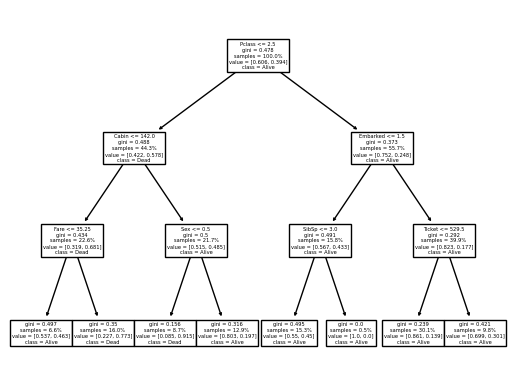

In [61]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

#for nice output
pd.set_option("display.max_rows", 1500)
pd.set_option("display.max_columns", 1500)
pd.set_option("display.width", 1500)

#no warnings
pd.set_option('future.no_silent_downcasting', True)

le = LabelEncoder()
df = pd.read_csv('data/titanic_train.csv')
# Apply LabelEncoder to each column
for column in ["Sex", "Embarked", "Ticket", "Cabin"]:
    df[column] = le.fit_transform(df[column])
del df["Name"]
y = pd.Series(data=df['Survived'].to_numpy())
del df["Survived"]

df_iris, y = shuffle(df, y, random_state=42)

# CV experiment
cls = RandomForestClassifier(n_estimators=100, random_state=42,max_depth=3)
cls.fit(df_iris, y)

plot_tree(cls.estimators_[0],class_names=["Alive", "Dead"],feature_names=df_iris.columns,proportion=True)
plt.show()

# Feature importance
feature_importances = pd.DataFrame(cls.feature_importances_,index=df_iris.columns)
feature_importances.columns = ['importance']



- Titanic importance
- Fit the classifer on titanic_train
- Compute feature importances
- Plot them as nice barplot with features as bars

             importance
PassengerId    0.012853
Pclass         0.126067
Sex            0.467347
Age            0.043111
SibSp          0.017062
Parch          0.014215
Ticket         0.089302
Fare           0.120015
Cabin          0.092502
Embarked       0.017526


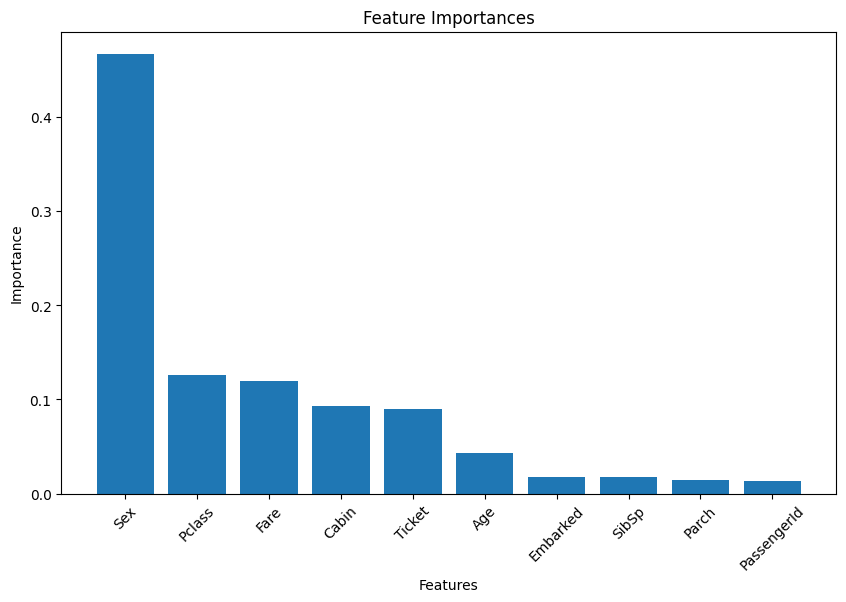

In [69]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 1500)
pd.set_option("display.max_columns", 1500)
pd.set_option("display.width", 1500)

pd.set_option('future.no_silent_downcasting', True)



# Feature importance
feature_importances = pd.DataFrame(cls.feature_importances_,index=df_iris.columns)
feature_importances.columns = ['importance']
print (feature_importances)
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importances.index, feature_importances['importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()
# Czasem warto przesiać zbiór z miniej ważnych cech płytszym lasem.


- Extra 1 - only if you have spare time ^..^
- Consider the first Titanic CV experiment
- Change it into GSCV -> sklearn.model_selection.GridSearchCV
- Perform grid search for better parameters in CV5 (stratified! But that's a default option...)
- Can you beat the accuracy of a classifier with default parameters? 


- Extra 2 - only if you have A LOT OF spare time ^..^
- Consider the Titanic tree experiment
- Try to choose a ,,representative'' tree for the RF instead of a random tree
- You will have to explain what a ,,representative tree'' is... ^..^
